In [1]:
import os
from os.path import join as oj
import sys, time
sys.path.insert(1, oj(sys.path[0], '..'))  # insert parent path
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from copy import deepcopy
import pickle as pkl
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_validate, ShuffleSplit, train_test_split
import pandas as pd
import data 
from collections import Counter

# plt.style.use('dark_background')
# sns.set(style="white")
%matplotlib inline
%load_ext autoreload
%autoreload 2
NUM_PATIENTS = 12044

In [2]:
features = data.get_features() # uses several forms
outcomes = data.get_outcomes() # 2 outcomes: iai, and iai_intervention
df = pd.merge(features, outcomes, on='id', how='left')
X_feats = data.preprocess(features)

# get actual features
X_np = X_feats.values
feature_names = list(X_feats)
y_np = outcomes['iai_intervention']

100%|██████████| 49/49 [00:01<00:00, 35.99it/s]
48it [00:03, 13.35it/s]


final shape (12044, 433)


In [4]:
print(X_feats.shape, list(X_feats.keys()))

(12044, 112) ['id', 'ageinyrs', 'EDTriageTime_1', 'InjuryDay_1', 'InjTmKnown_1', 'TriageTmUnkown_1', 'Certification_1', 'LtCostalTender_1', 'RtCostalTender_1', 'AbnChestAusc_1', 'FlankTender_1', 'PelvicTender_1', 'PelvisUnstable_1', 'NonAbdSurgery_1', 'CurrIntubated_1', 'PharmaParalyzed_1', 'PharmaSedated_1', 'AlcDrgSuspicion_1', 'GCSEye_1', 'GCSVerbal_1', 'GCSMotor_1', 'GCSScore_1', 'Preverbal_1', 'ShortBreath_1', 'InjuryMechanism_1', 'AbdUltrasound_1', 'AbdCTScan_1', 'PtHosp_1', 'BowelSounds_1', 'AbdomenTender_1', 'PeritonIrrit_1', 'RectalBlood_1', 'InitSysBP_1', 'InitSysBPRange_1', 'InitResp_1', 'InitRespRange_1', 'HRDocumented_1', 'InitHeartRate_1', 'IAISuspicion_1', 'IAIAcuteInterv_1', 'LabResultAware_1', 'RefuseFU_1', 'ChestCXR_4a', 'PelvicXR_4a', 'OthAbdImages_4a', 'AbdUltrasound1_4a', 'AbdCTScan1_4a', 'LabsObtained_5', 'SEX_F', 'SEX_M', 'RACE_American Indian or Alaska Native', 'RACE_Asian', 'RACE_Black or African American', 'RACE_Native Hawaaian or Other Pacific Islander', 'RAC

In [ ]:
print(k for k in X_feats.keys()])

In [5]:
Counter(y_np)

Counter({0: 11841, 1: 203})

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np)

In [7]:
Counter(y_train)

Counter({0: 8885, 1: 148})

# recreate original study

In [8]:
max_depth = 2
m = DecisionTreeClassifier(max_depth=max_depth, class_weight={0: 1, 1: 100})
cv = ShuffleSplit(n_splits=10, test_size=0.1, random_state=42)
m_cv = cross_validate(m, X_train, y_train, cv=5, scoring=['precision', 'recall', 'f1', 'balanced_accuracy', 'roc_auc'],
                      return_train_score=True, return_estimator=True)

In [9]:
print('metric\ttrain\ttest')
for key in m_cv:
    if 'test' in key:
        print(f"{key.replace('test_', '')}\t{np.mean(m_cv[key.replace('test', 'train')]):0.2f}\t{np.mean(m_cv[key]):0.2f}")
    

metric	train	test
precision	0.07	0.07
recall	0.89	0.87
f1	0.13	0.13
balanced_accuracy	0.83	0.82
roc_auc	0.88	0.88


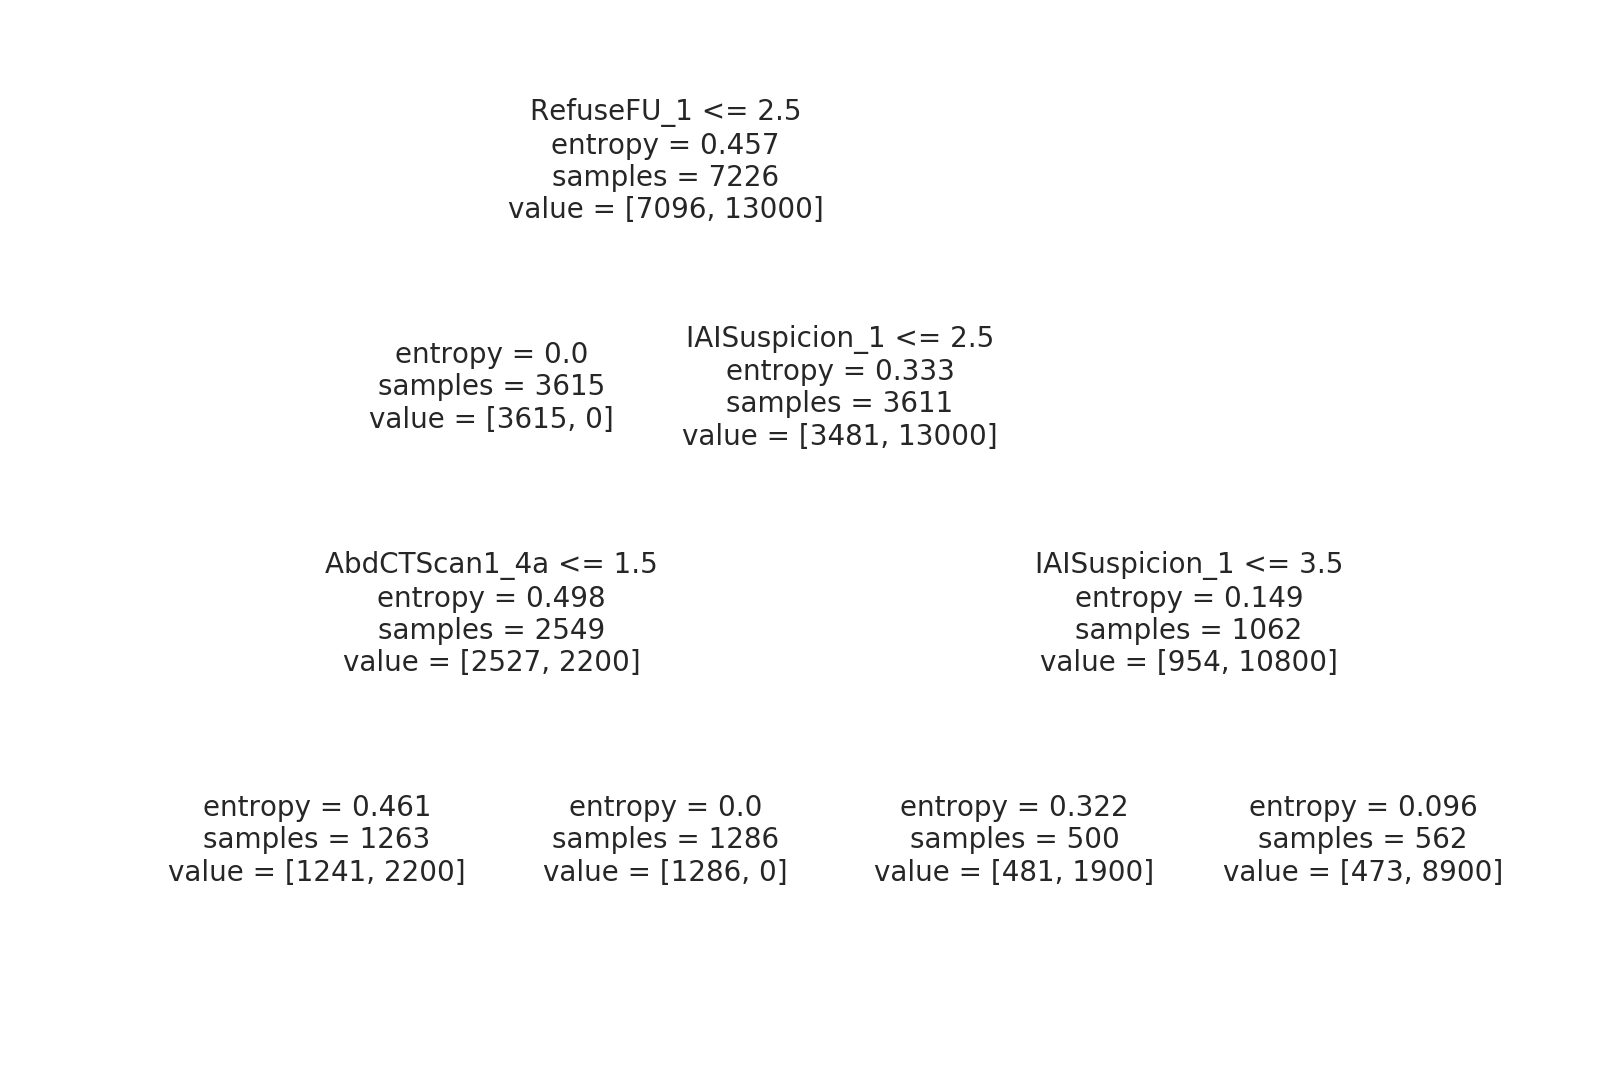

In [28]:
m_fit = m_cv['estimator'][0]
plt.figure(dpi=300)
plot_tree(m_fit, feature_names=feature_names)
plt.show()

In [9]:
# IAISuspicion_1 - Clinical suspicion for the presence of IAI identified on CT (split into 5 levels)
# IAIAcuteInterv_1 - Clinical suspicion for IAI in need of acute intervention (split into 5 levels)

In [10]:
corrs_feat = pd.merge(X_feats, outcomes, on='id', how='left').corr(method='kendall')
cs = corrs_feat.iai_intervention.sort_values(ascending=False)
cs = cs[~cs.isnull()]

# let's look at some important variables

In [11]:
print(cs[:30], cs[-30:])

iai_intervention                    1.000000
IAIAcuteInterv_1                    0.203900
AbdDistention_1_1                   0.190750
AbdTenderDegree_1_3.0               0.182814
IAISuspicion_1                      0.177862
AbdTrauma_1_1                       0.140139
AbdTrauma_or_SeatBeltSign_1_True    0.137807
GCSEye_1                            0.135348
RefuseFU_1                          0.128356
GCSMotor_1                          0.124774
ThoracicTender_1_3                  0.109951
GCSVerbal_1                         0.103195
VomitWretch_1_3                     0.096657
PeritonIrrit_1                      0.094013
DecrBreathSound_1_1                 0.092501
SeatBeltSign_1_1                    0.089327
InitResp_1                          0.075671
AbdomenPain_1_3                     0.072694
FlankTender_1                       0.072100
DistractingPain_1_3                 0.070763
PelvicTender_1                      0.065348
VomitWretch_1_1                     0.064815
AbdomenPai

In [ ]:
corrs_init = df.corr(method='kendall')
cs = corrs.iai_intervention.sort_values(ascending=False)
cs = cs[~cs.isnull()]

print(cs[:30], cs[-30:])

In [ ]:
df.AbdTenderDegree_1.fillna(4)